# Simple Binary Classification 

In the present we will exemplify briefly a simple binary classification problem by using five different learning algorithms over a dataset. This [data set](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)) contains 208 observations regarding the energy under certain conditions obtained by bouncing sonar signals off a metal cylinder or a rock. Based on 60 attributes each observation is labeled as **R** (rock) or **M** (mine-metal cylinder). 

The learning algorithms that will be used are linear regression, logistic regression, suport vector machine, k-nearest neighbors and decision tree. Finally, we will compare each model's performance on the test data selecting the one with the highest performance measure.


## Preprocessing Data 

First of all, lets have a look at the data we have in case some preprocessing needs to be done:

In [1]:
#Importing packages that might be used
using CSV
using DataFrames
using StatsBase
using MLDataPattern

#Reading data set
DataSet = DataFrame(CSV.File("data/sonar.csv", header=0))

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109
2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337
3,0.0262,0.0582,0.1099,0.1083,0.0974,0.228,0.2431,0.3771,0.5598
4,0.01,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598
5,0.0762,0.0666,0.0481,0.0394,0.059,0.0649,0.1209,0.2467,0.3564
6,0.0286,0.0453,0.0277,0.0174,0.0384,0.099,0.1201,0.1833,0.2105
7,0.0317,0.0956,0.1321,0.1408,0.1674,0.171,0.0731,0.1401,0.2083
8,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465
9,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684


As the corresponding **R**/**M** label is shown in the column 61, we will rename it and count the classes in order to check class imbalance. The first 60 columns will be the features.

In [2]:
DataSetF=DataSet[:, 1:60] #data set features
rename!(DataSet, :Column61 => :label) #data set class labels
countmap(DataSet.label) #count amount of samples for each class

Dict{String1, Int64} with 2 entries:
  "M" => 111
  "R" => 97

The data is indeed imbalanced as we have 111 mine examples and 97 rock examples, therefore we will resample it. For this we can either undersample by getting rid of some mine observations in order to work with 97 examples for each class, or oversample by using some rock observations several times in order to work with 111 for each. We will proceed to do the latter.

In [3]:
#Oversampling
os_features, os_labels = oversample((Array(DataSetF)',Array(DataSet.label))) 

#Defining balanced data set
balDataSet = DataFrame(Array(os_features')) #balanced data set features
balDataSet.label=os_labels #balanced data set class labels
balDataSet

,x1,x2,x3,x4,x5,x6,x7,x8,x9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684
2,0.0346,0.0509,0.0079,0.0243,0.0432,0.0735,0.0938,0.1134,0.1228
3,0.0265,0.044,0.0137,0.0084,0.0305,0.0438,0.0341,0.078,0.0844
4,0.0231,0.0315,0.017,0.0226,0.041,0.0116,0.0223,0.0805,0.2365
5,0.0202,0.0104,0.0325,0.0239,0.0807,0.1529,0.1154,0.0608,0.1317
6,0.0442,0.0477,0.0049,0.0581,0.0278,0.0678,0.1664,0.149,0.0974
7,0.0235,0.022,0.0167,0.0516,0.0746,0.1121,0.1258,0.1717,0.3074
8,0.0856,0.0454,0.0382,0.0203,0.0385,0.0534,0.214,0.311,0.2837
9,0.0156,0.021,0.0282,0.0596,0.0462,0.0779,0.1365,0.078,0.1038


We can see a data set with 222 samples now, 111 for each class. Finally, before we get started with the algorithms lets convert the categorical data into numerical data. In this case we will consider finding a mine as $1$ and $0$ otherwise (finding a rock).

In [4]:
balDataSet.label = Bool.(replace(balDataSet.label, "R" => 0, "M" => 1)) #replace class labels
countmap(balDataSet.label) #check class imbalance

Dict{Bool, Int64} with 2 entries:
  0 => 111
  1 => 111

## Models

To implement the supervised learning algorithms and being able to check the model performances, one last step regarding the data set will be data partitioning to get a training subset and a testing subset. 

In [13]:
using MLDataUtils

#Randomly splitting data into two disjoint subsets (the default data distribution is 70%-30%)
TrainSet, TestSet = splitobs(shuffleobs(balDataSet))

(155×61 SubDataFrame. Omitted printing of 54 columns
│ Row │ x1      │ x2      │ x3      │ x4      │ x5      │ x6      │ x7      │
│     │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ 0.0856  │ 0.0454  │ 0.0382  │ 0.0203  │ 0.0385  │ 0.0534  │ 0.214   │
│ 2   │ 0.0269  │ 0.0383  │ 0.0505  │ 0.0707  │ 0.1313  │ 0.2103  │ 0.2263  │
│ 3   │ 0.0239  │ 0.0189  │ 0.0466  │ 0.044   │ 0.0657  │ 0.0742  │ 0.138   │
│ 4   │ 0.0519  │ 0.0548  │ 0.0842  │ 0.0319  │ 0.1158  │ 0.0922  │ 0.1027  │
│ 5   │ 0.0423  │ 0.0321  │ 0.0709  │ 0.0108  │ 0.107   │ 0.0973  │ 0.0961  │
│ 6   │ 0.0225  │ 0.0019  │ 0.0075  │ 0.0097  │ 0.0445  │ 0.0906  │ 0.0889  │
│ 7   │ 0.0187  │ 0.0346  │ 0.0168  │ 0.0177  │ 0.0393  │ 0.163   │ 0.2028  │
│ 8   │ 0.0335  │ 0.0134  │ 0.0696  │ 0.118   │ 0.0348  │ 0.118   │ 0.1948  │
│ 9   │ 0.0715  │ 0.0849  │ 0.0587  │ 0.0218  │ 0.0862  │ 0.1801  │ 0.1916  │
│ 10  │ 0.0

In [14]:
TrainSetF=TrainSet[:,1:60]; #train data set features
TestSetF=TestSet[:,1:60]; #test data set features
countmap(TestSet.label) 

Dict{Bool, Int64} with 2 entries:
  0 => 33
  1 => 34

Once each model is built based on the training data set, we will compute its predictions over the testing set. We will then be able to observe the performance of the model by comparing the true test labels and the predicted test labels. These results can be sumarized with a *confusion matrix* that provides information for some evaluation metrics. For now we will just compute it using the `EvalMetrics` package, as we will discuss its interpretation in the next section. 

### Linear Regression

This first regression learning algorithm learns a model as a linear combination of the atributtes displayed in the feature vectors of the train set. It will find the adequate parameters by minimizing the average loss so the defined hyperplane results as close as possible to the training samples. 

In [15]:
using GLM #using GLM package for Linear Regression Model

linmod = lm(@formula(label ~ x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40+x41+x42+x43+x44+x45+x46+x47+x48+x49+x50+x51+x52+x53+x54+x55+x56+x57+x58+x59+x60), TrainSet) #define the formula for the class as a linear combination of the features

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

label ~ 1 + x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11 + x12 + x13 + x14 + x15 + x16 + x17 + x18 + x19 + x20 + x21 + x22 + x23 + x24 + x25 + x26 + x27 + x28 + x29 + x30 + x31 + x32 + x33 + x34 + x35 + x36 + x37 + x38 + x39 + x40 + x41 + x42 + x43 + x44 + x45 + x46 + x47 + x48 + x49 + x50 + x51 + x52 + x53 + x54 + x55 + x56 + x57 + x58 + x59 + x60

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error      t  Pr(>|t|)    Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)   -0.0286078     0.28164   -0.10    0.9193   -0.58781     0.530594
x1             0.538461      2.22244    0.24    0.8091   -3.87425     4.95117
x2             2.20574       2.04447    1.08    0.28

With the parameters (Coef.) given by the previous model by studiyng the training set we can now have a look at the predictions it does over a new set of data, which is precisely the testing set.

In [16]:
linmod_pred=GLM.predict(linmod,TestSet) #use package predict function to make predictions with the model

67-element Vector{Union{Missing, Float64}}:
  0.7971993224806374
  0.8171877466270728
  0.9468657587983726
 -0.15530396668300434
  0.01723125397554992
  0.8178889615099193
  0.7736699830665396
  0.9751990722251438
  0.9516603281732362
  0.9173749138099352
  0.41063839287366993
  0.5349359677015226
  0.2540809040402854
  ⋮
  0.7961949354517014
  0.599391274838849
  0.47269641983663585
  0.2751310479440279
  0.28621412471731433
  0.8568398879320764
  0.23555933613016286
  0.657052333399665
  0.32862517593022783
  0.640766998579105
  1.169720904426132
  0.04708397536355886

Notice that the predicted labels given do not exactly correspond to the classes we have, for these predictions represent a probability score for each test example. Therefore, we need to convert this probability to a class, which we can do by considering all scores under $0.5$ belonging to the class $0$ and belonging to the class $1$ elsewise. 

In [17]:
linmod_predlabel = Bool.([if x < 0.5 0 else 1 end for x in linmod_pred]) #convert scores under 0.5 into class 0 and into class 1 in other case

67-element BitVector:
 1
 1
 1
 0
 0
 1
 1
 1
 1
 1
 0
 1
 0
 ⋮
 1
 1
 0
 0
 0
 1
 0
 1
 0
 1
 1
 0

We finally have the corresponding class predictions of the model for each test sample. This will be latter compared with the actual labels of the test set so the performance of the model can be evaluated. The following calculations will be useful at the end when assessing this issue. 

In [18]:
#Computing performance metrics
using EvalMetrics
lmpredprob=Float64.(linmod_pred) #model's predictions as probability scores
lmpred=Int64.(linmod_predlabel) #model's predictions as classes
lmtest=Int64.(TestSet.label) #test sample's actual classes

p_linmod=EvalMetrics.precision(lmtest, lmpred) #computing model's precision
acc_linmod=EvalMetrics.accuracy(lmtest, lmpred) #computing model's accuracy
rec_linmod=EvalMetrics.true_positive_rate(lmtest, lmpred) #computing model's recall
cf_linmod=EvalMetrics.ConfusionMatrix(lmpred, lmtest ) #computing model's confusion matrix

ConfusionMatrix{Int64}(38, 29, 27, 22, 7, 11)

### Logistic Regression

Logistic regression classification learning algorithm uses the properties of the sigmoid function to make classification predictions. It will search for the parameters that will also to maximize the likelihood of the training set.

The following procedure in analogous as done in the linear regression model.

In [19]:
using GLM #using GLM package for Logistic Regression Model

logmod=glm(@formula(label~ x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34+x35+x36+x37+x38+x39+x40+x41+x42+x43+x44+x45+x46+x47+x48+x49+x50+x51+x52+x53+x54+x55+x56+x57+x58+x59+x60), TrainSet, Binomial(), LogitLink()); #define the formula for the class as a linear combination of the features specifying binomial family 

In [20]:
logmod_pred=GLM.predict(logmod,TestSet); #use package predict function to make predictions with the model
logmod_predlabel = Bool.([if x < 0.5 0 else 1 end for x in logmod_pred]) #converting probability scores into classes

67-element BitVector:
 1
 1
 1
 0
 0
 1
 1
 1
 0
 1
 0
 1
 0
 ⋮
 1
 1
 0
 0
 1
 1
 0
 1
 0
 1
 1
 0

In [21]:
#Computing performance metrics
lgpredprob=Float64.(logmod_pred) #model's predictions as probability scores
lgpred=Int64.(logmod_predlabel) #model's predictions as classes
lgtest=Int64.(TestSet.label) #test sample's actual classes

p_logmod=EvalMetrics.precision(lgtest, lgpred) #computing model's precision
acc_logmod=EvalMetrics.accuracy(lgtest, lgpred) #computing model's accuracy
rec_logmod=EvalMetrics.true_positive_rate(lgtest, lgpred) #computing model's recall
cf_logmod=EvalMetrics.ConfusionMatrix(lgpred, lgtest ) #computing model's confusion matrix

ConfusionMatrix{Int64}(38, 29, 26, 21, 8, 12)

### Suport Vector Machine

The SVM learning algorithm will determine a hyperplane with the objective of separating the points corresponding to each of the classes, aiming for the largest margin (distance between the diferent classes) in order to minimize the generalization error. 

In [22]:
using LIBSVM #using LIBSVM package for SVM model

#LIBSVM package requires the orientation of the feature data sets to be horizontal (each row containing features and each column contaning samples)
SVMmod = svmtrain(Array(TrainSetF)', TrainSet.label) 

SVMmod_predlabel, decisionvalues = svmpredict(SVMmod, Array(TestSetF)') #using package predict function to make predictions with the model
SVMmod_predlabel

67-element Vector{Bool}:
 0
 1
 0
 0
 0
 1
 1
 1
 1
 1
 0
 1
 1
 ⋮
 1
 1
 1
 0
 1
 1
 0
 1
 1
 0
 1
 0

It can be noticed here that SVM offers classification rather than probabilistic predictions. 

In [23]:
#Computing performance metrics
SVMpred=Int64.(SVMmod_predlabel) #model's predictions as classes
SVMtest=Int64.(TestSet.label) #test sample's actual classes

p_SVMmod=EvalMetrics.precision(SVMtest, SVMpred) #computing model's precision
acc_SVMmod=EvalMetrics.accuracy(SVMtest, SVMpred) #computing model's acurracy
rec_SVMmod=EvalMetrics.true_positive_rate(SVMtest, SVMpred) #computing model's recall
cf_SVMmod=EvalMetrics.ConfusionMatrix(SVMpred, SVMtest ) #computing model's confusion matrix

ConfusionMatrix{Int64}(40, 27, 26, 19, 8, 14)

### Nearest Neighbors

k-Nearest Neighbors is a learning algorithm that will use the training data with each new sample to search for the $k$ nearest neighbors (according to a certain metric, in this case Euclidean). Then, the most occurrent class within these neighbors can be used to classify the sample. This is a non-parametric algorithm.

In [24]:
using NearestNeighbors #using NearestNeighbors package for finding nearest neighbors

#NearestNeighbors package requires the orientation of the feature data sets to be horizontal (each row containing features and each column conitaning samples)
traintree= KDTree(Array(TrainSetF)') #use k-dimensional tree constructor to convert data set into 60-d tree (data structure that will be more efficient)
testpoints=Array(TestSetF)' 
k=3 #number of nearest neighbors

nbors, dists=knn(traintree,testpoints, k, true) #find k nearest neighbors sorted by distances using knn function
nbors #k nearest neighbors index for each test sample

67-element Vector{Vector{Int64}}:
 [66, 117, 34]
 [7, 50, 100]
 [83, 127, 102]
 [6, 18, 75]
 [125, 19, 55]
 [114, 83, 102]
 [16, 54, 65]
 [109, 130, 73]
 [90, 83, 127]
 [102, 127, 79]
 [91, 48, 133]
 [77, 48, 60]
 [3, 13, 10]
 ⋮
 [65, 130, 49]
 [48, 91, 133]
 [109, 113, 59]
 [146, 98, 96]
 [48, 57, 52]
 [111, 16, 130]
 [73, 71, 23]
 [109, 95, 113]
 [119, 149, 97]
 [66, 34, 117]
 [27, 48, 60]
 [82, 75, 37]

Notice that the output of this function are the index in the training set of the nearest neighbors for each of the test points, as well as the distances. However, as we are interested in the class of these neighbors some postprocessing must be done with this information. 

In [25]:
nbors_index = (hcat(nbors...))' #rewrite the knn data (vector of vectors) as a matrix for indexing 
nbors_label = TrainSet.label[nbors_index] #use the matrix indexes to retrieve each neighbor's corresponding label

67×3 BitMatrix:
 1  0  1
 1  1  1
 1  1  1
 0  0  0
 0  0  0
 0  1  1
 0  1  0
 1  0  0
 0  1  1
 1  1  1
 1  1  1
 1  1  0
 0  0  0
 ⋮     
 0  0  0
 1  1  1
 1  1  1
 0  1  0
 1  0  0
 0  0  0
 0  0  0
 1  1  1
 1  1  1
 1  1  0
 1  1  0
 0  0  0

We now have an array where each row exhibits the classes of the nearest neighbors of the corresponding testing sample. By choosing he class with the highest occurrence we can label the sample. 

In [26]:
l=size(TestSet,1)
KNNmod_predlabel= [argmax(countmap(nbors_label[i, :]))  for i in 1:l] #counting each class ocurrence and selecting the highest argument class

67-element Vector{Bool}:
 1
 1
 1
 0
 0
 1
 0
 0
 1
 1
 1
 1
 0
 ⋮
 0
 1
 1
 0
 0
 0
 0
 1
 1
 1
 1
 0

In [27]:
#Computing preformance metrics
KNNmod_predproblabel= [mean(nbors_label[i, :])  for i in 1:l] #probabilistic prediction than class prediction using average function instead of maxargument 
KNNpredprob=Float64.(KNNmod_predproblabel) #model's predictions as probability scores
KNNpred=Int64.(KNNmod_predlabel) #model's predictions as classes
KNNtest=Int64.(TestSet.label) #test sample's actual classes

p_KNNmod=EvalMetrics.precision(KNNtest, KNNpred) #computing model's precision
acc_KNNmod=EvalMetrics.accuracy(KNNtest, KNNpred) #computing model's accuracy
rec_KNNmod=EvalMetrics.true_positive_rate(KNNtest, KNNpred) #computing model's recall
cf_KNNmod=EvalMetrics.ConfusionMatrix(KNNpred, KNNtest ) #computing model's confusion matrix

ConfusionMatrix{Int64}(34, 33, 28, 27, 6, 6)

### Decision Tree
This algortihm builds an acyclic graph where each branching node represents a freature that will be evaluated according to an specific threshold. In this way decisions refering to the class of an example can be made when reaching a leaf node.

In [28]:
using DecisionTree #using DecisionTree package for decision tree model


DTmod = DecisionTreeClassifier(max_depth=10) #use decision tree constructor with corresponding arguments (we are only using maximum dept)
DecisionTree.fit!(DTmod , Array(TrainSetF), TrainSet.label) #fit training data to the model

print_tree(DTmod) #print model 

Feature 12, Threshold 0.22065
L-> Feature 20, Threshold 0.5246500000000001
    L-> Feature 47, Threshold 0.31915
        L-> false : 42/42
        R-> Feature 46, Threshold 0.54
            L-> true : 2/2
            R-> false : 1/1
    R-> Feature 45, Threshold 0.16155
        L-> Feature 48, Threshold 0.0732
            L-> Feature 53, Threshold 0.00145
                L-> true : 1/1
                R-> false : 13/13
            R-> true : 3/3
        R-> true : 11/11
R-> Feature 52, Threshold 0.009399999999999999
    L-> Feature 27, Threshold 0.89465
        L-> Feature 30, Threshold 0.377
            L-> Feature 30, Threshold 0.24555
                L-> Feature 41, Threshold 0.0948
                    L-> true : 1/1
                    R-> false : 4/4
                R-> true : 4/4
            R-> false : 13/13
        R-> true : 7/7
    R-> Feature 40, Threshold 0.43220000000000003
        L-> true : 40/40
        R-> Feature 31, Threshold 0.56925
            L-> true : 7/7
      

In [29]:
DTmod_predlabel=DecisionTree.predict(DTmod,Array(TestSet)) #use package predict function to make predictions with the model

67-element Vector{Bool}:
 1
 1
 1
 0
 0
 0
 1
 1
 1
 1
 1
 0
 0
 ⋮
 1
 1
 1
 0
 1
 1
 0
 1
 1
 1
 1
 0

In [30]:
#Computing preformance metrics
DTmod_predproblabel=DecisionTree.predict_proba(DTmod,Array(TestSet)) #probabilistic prediction using package predict function
DTpredprob = Float64.(DTmod_predproblabel[:,2]) #model's predictions as probability scores
DTpred=Int64.(DTmod_predlabel) #model's predictions as classes
DTtest=Int64.(TestSet.label) #test sample's actual classes

p_DTmod=EvalMetrics.precision(DTtest, DTpred) #computing model's precision
acc_DTmod=EvalMetrics.accuracy(DTtest, DTpred) #computing model's accuracy
rec_DTmod=EvalMetrics.true_positive_rate(DTtest, DTpred) #computing model's recall
cf_DTmod=EvalMetrics.ConfusionMatrix(DTpred, DTtest) #computing model's confusion matrix

ConfusionMatrix{Int64}(38, 29, 30, 25, 4, 8)

## Model Performance

When assessing the performance of a model we can compare the labels predicted by the model with the true labels of the test set in order to observe whether the predictions weere accurate or not. For each of this couples we can determine four different results: **tp** (true positive) are true (1) examples correctly classified, **tn** (true negative) are false (0) examples correctly classified, **fn** (false negative) true (1) examples incorrectly predicted as false (0) and **fp** (false positive) false (0) examples incorrectly predicted as true (1). These can be summarized with a *confusion matrix* in the following way:

| Actual class/Predicted class | Positive (PP) | Negative (PN) |
| :- | :-: | :-: |
|Actual Positive (P) | True Positive (**TP**)  | False Negative (**FN**)
|Actual Negative (N) | False Positive (**FP**) | True Negative (**TN**)


The information of the confusion matrix is helpful to establish different metrics that are useful in the analysis of the performance of the model. For example, the accuracy, which represents the number of correctly classified samples, is measured as: 

$$accuracy=\displaystyle\frac{TP+TN}{TP+TN+FP+FN}.$$

Other metrics we can calculate are:  

$$precision=\displaystyle\frac{TP}{TP+FP} \text{ and }recall=\displaystyle\frac{TP}{TP+FN}.$$

There are different metrics because a "good" performance of a model can mean different things according to the nature of the data, for some classification mistakes might be more tolerable than others. For example, if both classes were to be equally important, accuracy would be a useful metric. However, there are situations where some mistakes are more serious than others. Suppose you are classifying tests for detecting a virus (COVID for instance), labelling a healthy person as infected (1) will be a false positive and is a mistake we want to avoid, but labeling an infected person as healthy (who can spread the virus and whose condition may worsen without treatment) will be a false negative and it's a mistake we want to avoid with higher priority. Therefore, we care especially for the percentage of actual positives that were predicted correctly, which is called sensitivity/recall, and we could tolerate a lower specificity, which is the percentage of actual negatives that were predicted correctly. While the recall will indicate the percentage of all 1's that are correctly predicted, precision will indicate what percentage of predicted 1's are correct. 

In the present example we could consider the rock/mine classification as a situation similar to that described above, where classifying the positives correctly is more important than classifying the false, and consequently consider the corresponding metrics useful for this situation. Although the confusion matrix gives us the information for calculating these, the `EvalMetrics` package does that directly with several different metrics as we already did before when developing each model.

Let us then display this information in a way that is easier to compare:

In [31]:
Metrics = DataFrame(
Model = ["Linear Regression", "Logistic Regression", "Suport Vector Machine","k-Nearest Neighbors", "Decision Tree"],
Accuracy = [acc_linmod, acc_logmod, acc_SVMmod, acc_KNNmod, acc_DTmod], 
Precision = [p_linmod, p_logmod, p_SVMmod, p_KNNmod, p_DTmod],
Recall = [rec_linmod, rec_logmod, rec_SVMmod, rec_KNNmod, rec_DTmod])

,Model,Accuracy,Precision,Recall
,String,Float64,Float64,Float64
1,Linear Regression,0.731343,0.710526,0.794118
2,Logistic Regression,0.701493,0.684211,0.764706
3,Suport Vector Machine,0.671642,0.65,0.764706
4,k-Nearest Neighbors,0.820896,0.823529,0.823529
5,Decision Tree,0.820896,0.789474,0.882353


In [32]:
(maximum(Metrics.Accuracy), maximum(Metrics.Precision), maximum(Metrics.Recall))

(0.8208955223880597, 0.8235294117647058, 0.8823529411764706)

We can see that the overall performance of the kNN and DT models has shown to be the best according to the metrics displayed above. In terms of accuracy, they don't seem to be substantially different. Thus, it depends on considering the recall as completely determinant, which would refer to the DT model as the best, or on considering a prevailing balance regarding the metrics, which would lead as to de kNN model. A high precision as well as recall is suitable.

 As a conclusion, considering what mentioned above regarding the useful metrics for this problem, we could consider the **k nearest neighbors** model as the one with best performance amongst all. This model offers an accuracy of $82\%$.

As an aditional comment, besides from using the confusion matrix, another method for assessing the performance of the models corresponds to the *ROC curve* which summarizes the performance based on the true positive rate (recall) and the false positive rate. However, this can only be used when the output prediction is given in terms of a probability score, which is why we computed probability predictions for the models as well. The criterion for this method is simple: the greater the area under the ROC curve (AUC), the better the classification model. Finally, lets plot the corresponding ROC curves in case this metric is considered useful:

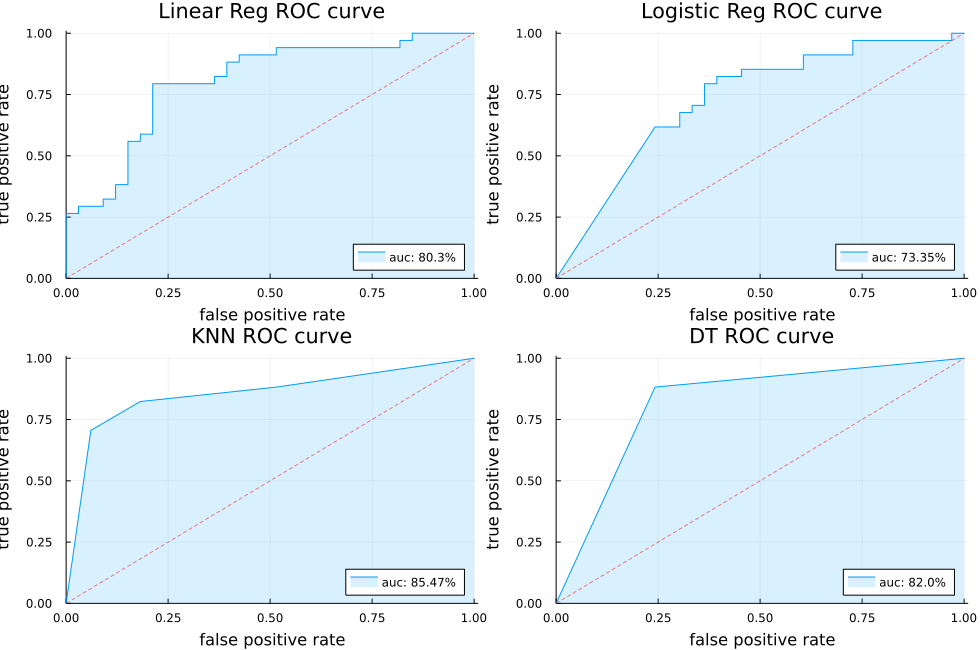

In [33]:
#using packages for plotting ROC curves
using Plots
using EvalMetrics

linroc=rocplot(lmtest, lmpredprob, title="Linear Reg ROC curve")
logroc=rocplot(lmtest, lgpredprob, title="Logistic Reg ROC curve")
KNNroc=rocplot(lmtest, KNNpredprob, title="KNN ROC curve")
DTroc=rocplot(lmtest, DTpredprob, title="DT ROC curve")
plot(linroc, logroc, KNNroc, DTroc, size=(980,650))

As we can see, in comparison the kNN model offers a better performance according to this metric as well. 

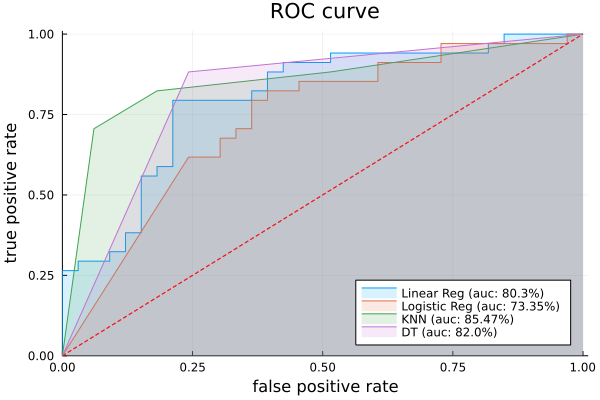

In [34]:
rocplot(lmtest, lmpredprob, label="Linear Reg")
rocplot!(lmtest, lgpredprob, label="Logistic Reg")
rocplot!(lmtest, KNNpredprob, label="KNN")
rocplot!(lmtest, DTpredprob, label="DT")

## Bibliography
1. Burkov, A. (2019). Linear Regression. En The Hundred-page Machine Learning Book (pp. 21–25). Andriy Burkov.